<a href="https://colab.research.google.com/github/arcadelab/deepdrr/blob/dev/deepdrr_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pycuda # install cuda
!pip install -U git+https://github.com/arcadelab/deepdrr@dev # install deepdrr latest
!sudo apt-get install libgl1-mesa-dev xvfb # install headless display tools

  Cloning https://github.com/arcadelab/deepdrr (to revision dev) to /tmp/pip-req-build-7ozox5lh
  Running command git clone -q https://github.com/arcadelab/deepdrr /tmp/pip-req-build-7ozox5lh
  Running command git checkout -b dev --track origin/dev
  Switched to a new branch 'dev'
  Branch 'dev' set up to track remote branch 'dev' from 'origin'.
  Created wheel for deepdrr: filename=deepdrr-1.1.0a2-cp37-none-any.whl size=529062 sha256=7ff54f86bd438c1cc180018d67aab8a9921bc09c103a45591353499b38027ebf
  Stored in directory: /tmp/pip-ephem-wheel-cache-8pg8w3bh/wheels/c2/f7/55/c02355edd2a1a1ed71b350f5426289037d68e150ec5746194b
Successfully built deepdrr
  Found existing installation: deepdrr 1.1.0a2
    Uninstalling deepdrr-1.1.0a2:
      Successfully uninstalled deepdrr-1.1.0a2
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgl1-mesa-dev is already the newest version (20.0.8-0ubuntu1~18.04.1).
xvfb is already the newest version (2:1.19.6-1

In [1]:
import numpy as np
from PIL import Image
import deepdrr
from deepdrr import geo
from deepdrr.utils import testing

In [2]:
path = testing.download_sampledata("CT-chest")

In [26]:
volume = deepdrr.Volume.from_nrrd(path)
volume.rotate([-np.pi / 2, 0, 0])
carm = deepdrr.MobileCArm(isocenter=volume.center_in_world, alpha=45, beta=30, degrees=True)

In [ ]:
deepdrr.vis.show(volume, carm, full=[False, True]) # not working for some reason

In [27]:
with deepdrr.Projector(
    volume=volume,
    carm=carm,
    step=0.1,  # stepsize along projection ray, measured in voxels
    mode="linear",
    max_block_index=200,
    spectrum="90KV_AL40",
    photon_count=100000,
    add_scatter=False,
    threads=8,
    neglog=True,
) as projector:
    image = projector.project()

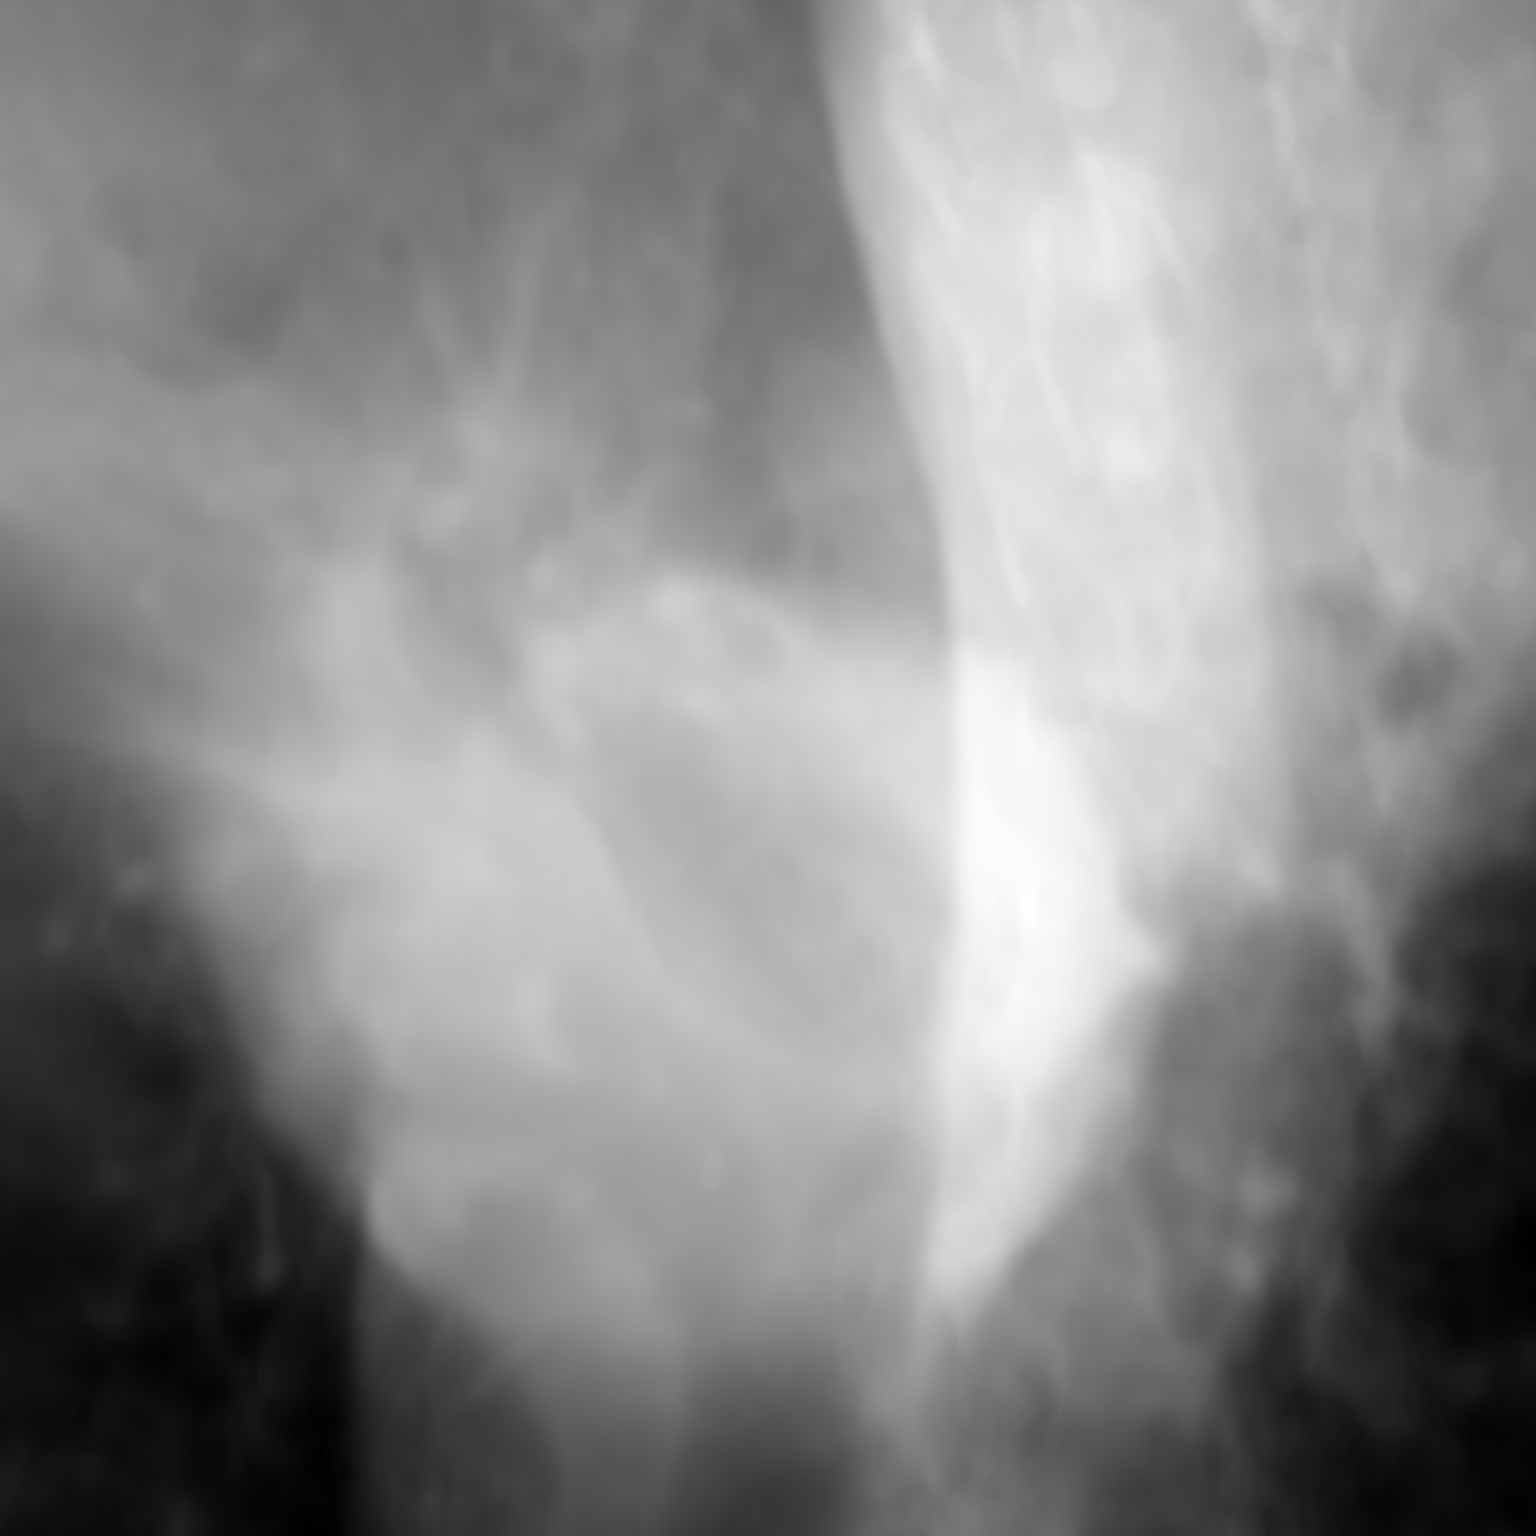

In [28]:
Image.fromarray((image * 255).astype(np.uint8))